In [11]:
import pandas as pd

# Veri setini okuma
veri = pd.read_csv('albumlist.csv', encoding='ISO-8859-1')

# Veri setini görüntüleme
print(veri.head())

   Number  Year                                  Album          Artist  \
0       1  1967  Sgt. Pepper's Lonely Hearts Club Band     The Beatles   
1       2  1966                             Pet Sounds  The Beach Boys   
2       3  1966                               Revolver     The Beatles   
3       4  1965                   Highway 61 Revisited       Bob Dylan   
4       5  1965                            Rubber Soul     The Beatles   

       Genre                       Subgenre  
0       Rock  Rock & Roll, Psychedelic Rock  
1       Rock     Pop Rock, Psychedelic Rock  
2       Rock     Psychedelic Rock, Pop Rock  
3       Rock          Folk Rock, Blues Rock  
4  Rock, Pop                       Pop Rock  


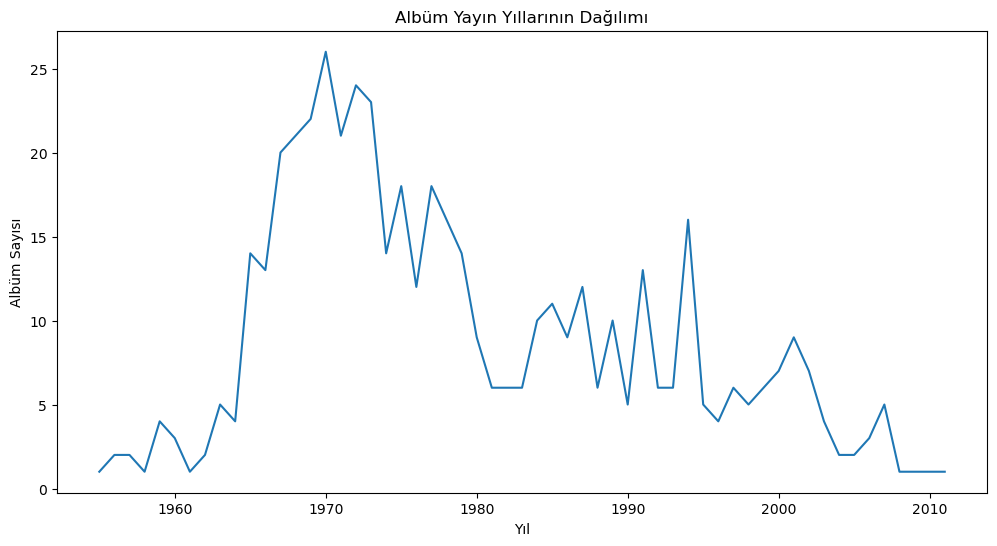

In [17]:
import matplotlib.pyplot as plt

# Yıllara göre albüm sayısını hesaplayın
album_sayısı = veri['Year'].value_counts().sort_index()

# Çizgi grafiği oluşturun
plt.figure(figsize=(12, 6))
album_sayısı.plot(kind='line')
plt.title('Albüm Yayın Yıllarının Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Albüm Sayısı')
plt.show()

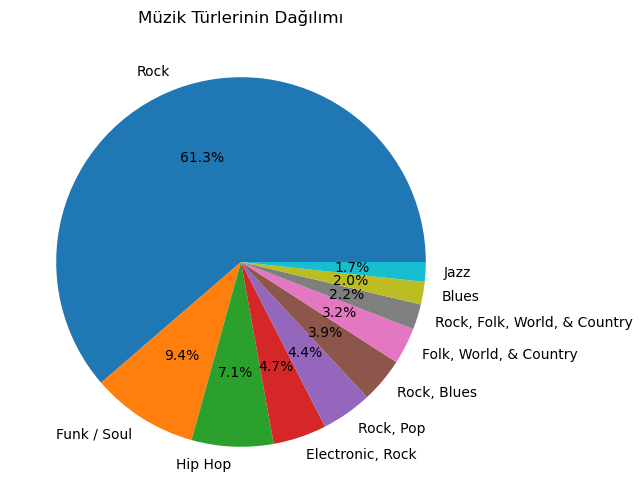

In [18]:
# Müzik türlerinin sayısını hesaplayın
müzik_türleri = veri['Genre'].value_counts().head(10)

# Pasta grafiği oluşturun
plt.figure(figsize=(10, 6))
plt.pie(müzik_türleri, labels=müzik_türleri.index, autopct='%1.1f%%')
plt.title('Müzik Türlerinin Dağılımı')
plt.show()

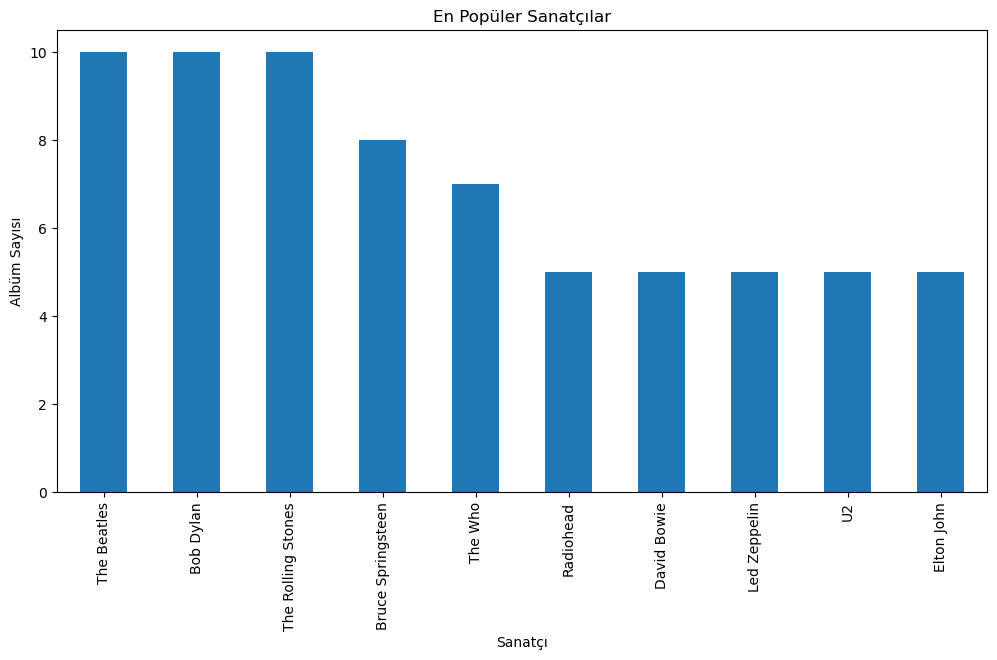

In [19]:
# Sanatçıların albüm sayısını hesaplayın
en_popüler_sanatçılar = veri['Artist'].value_counts().head(10)

# Çubuk grafiği oluşturun
plt.figure(figsize=(12, 6))
en_popüler_sanatçılar.plot(kind='bar')
plt.title('En Popüler Sanatçılar')
plt.xlabel('Sanatçı')
plt.ylabel('Albüm Sayısı')
plt.show()


In [23]:
# Yıl sütununu kullanarak 1963 yılındaki albümleri filtreleme
albümler_1963 = veri[veri['Year'] == 1963]

# Filtrelenmiş veriyi görüntüleme
print(albümler_1963)

     Number  Year                                              Album  \
24       25  1963                           Live at the Apollo, 1962   
38       39  1963                                   Please Please Me   
96       97  1963                         The Freewheelin' Bob Dylan   
141     142  1963         A Christmas Gift for You From Phil Spector   
421     422  1963  Presenting the Fabulous Ronettes Featuring Ver...   

           Artist                   Genre              Subgenre  
24    James Brown             Funk / Soul  Rhythm & Blues, Soul  
38    The Beatles                    Rock     Beat, Rock & Roll  
96      Bob Dylan  Folk, World, & Country                  Folk  
141  Phil Spector  Rock, Funk / Soul, Pop              Pop Rock  
421  The Ronettes               Rock, Pop    Rock & Roll, Vocal  


<Figure size 1200x600 with 0 Axes>

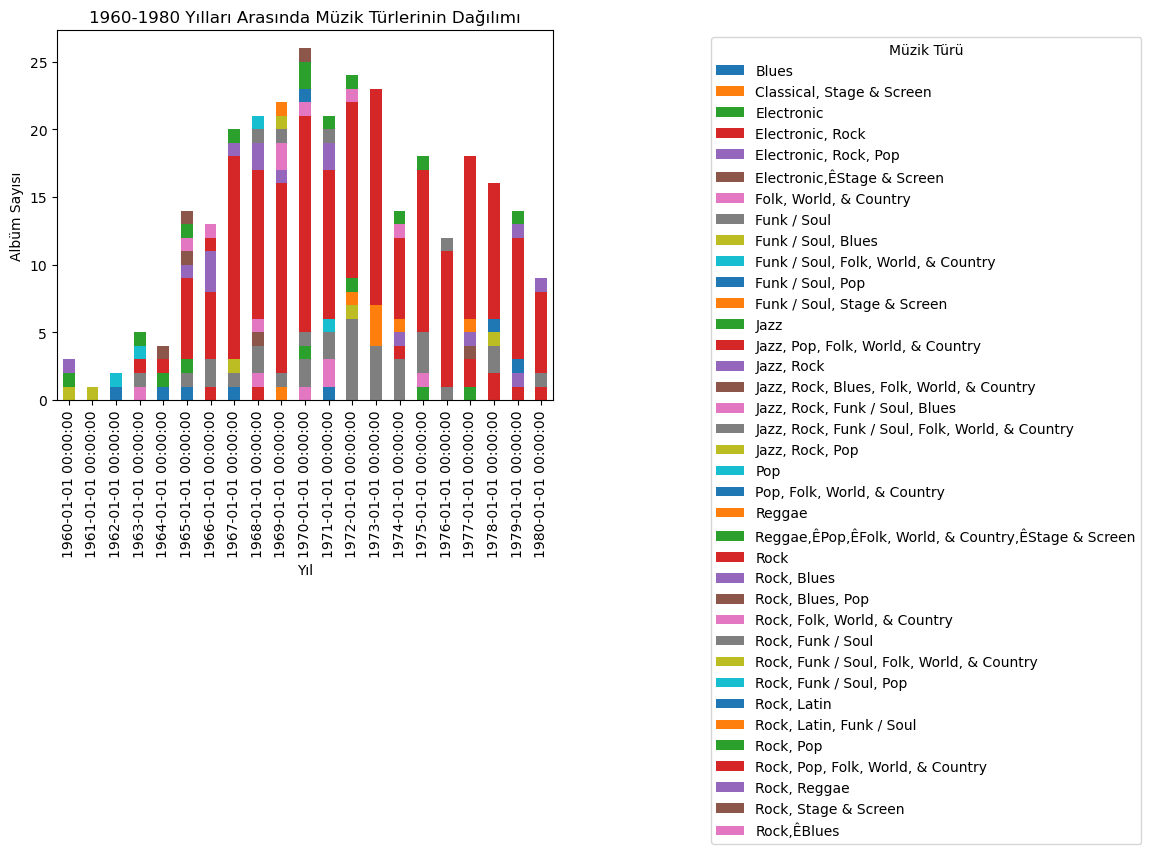

In [58]:
# Yıl sütununu datetime türüne çevirme
veri['Year'] = pd.to_datetime(veri['Year'], format='%Y')

# 1960, 1970 ve 1980 yılları arasındaki albümleri filtreleme
filtre = ((veri['Year'].dt.year >= 1960) & (veri['Year'].dt.year <= 1980))
albümler_60_70_80 = veri[filtre]

# Her yıl için müzik türlerinin sayısını hesaplama
müzik_türleri_sayısı = albümler_60_70_80.groupby(['Year', 'Genre']).size().unstack()

# Grafiği oluşturma
plt.figure(figsize=(12, 6))
müzik_türleri_sayısı.plot(kind='bar', stacked=True)
plt.title('1960-1980 Yılları Arasında Müzik Türlerinin Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Albüm Sayısı')
plt.legend(title='Müzik Türü', loc='upper right', bbox_to_anchor=(2.2, 1))
plt.show()

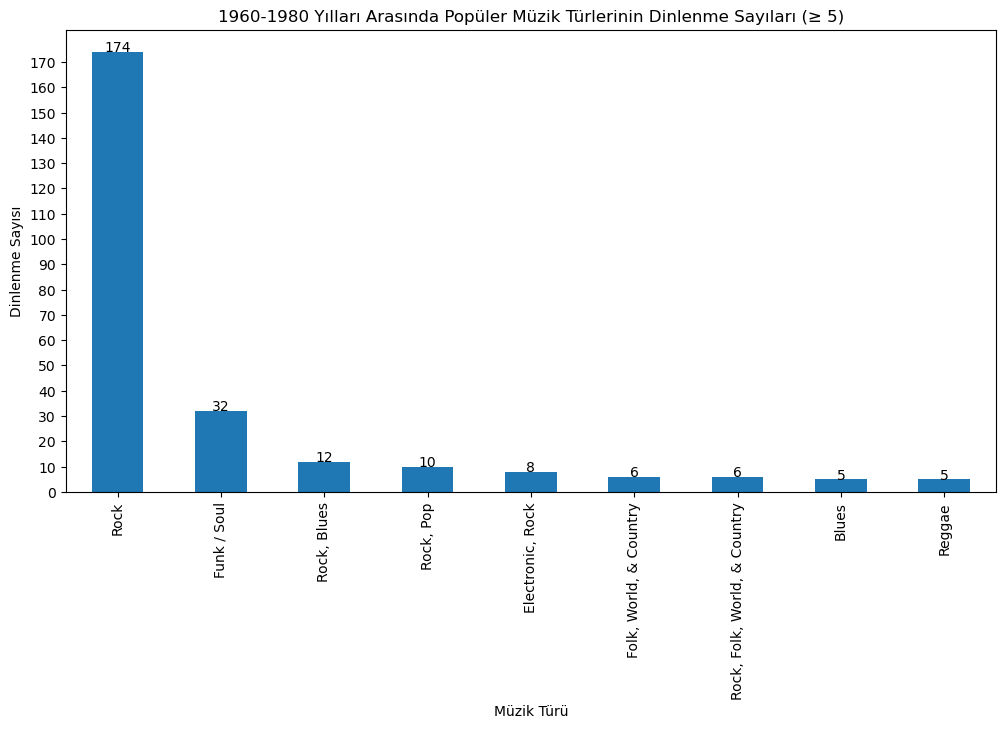

1960-1980 yılları arasında en az dinlenen müzik türü: Funk / Soul, Folk, World, & Country


In [57]:
# 1960 ve 1980 yılları arasındaki albümleri filtreleme
filtre = ((veri['Year'].dt.year >= 1960) & (veri['Year'].dt.year <= 1980))
albümler_70_80 = veri[filtre]

# Her yıl için müzik türlerinin dinlenme sayısını hesaplama
dinlenme_sayısı = albümler_70_80['Genre'].value_counts()

# En az dinlenen müzik türünü bulma
en_az_dinlenen_müzik_türü = dinlenme_sayısı.idxmin()

# Dinlenme sayısı eşik değeri
dinlenme_esik_degeri = 5

# Dinlenme sayısı eşik değerini aşan müzik türlerini seçme
popüler_müzik_türleri = dinlenme_sayısı[dinlenme_sayısı >= dinlenme_esik_degeri]

# Grafiği oluşturma
plt.figure(figsize=(12, 6))
popüler_müzik_türleri.plot(kind='bar')
plt.title('1960-1980 Yılları Arasında Popüler Müzik Türlerinin Dinlenme Sayıları (≥ 5)')
plt.xlabel('Müzik Türü')
plt.ylabel('Dinlenme Sayısı')
plt.xticks(rotation=90)
plt.yticks(range(0, max(dinlenme_sayısı)+1, 10))

for i in range(len(popüler_müzik_türleri)):
    plt.text(i, popüler_müzik_türleri.iloc[i], str(popüler_müzik_türleri.iloc[i]), ha='center')

plt.show()


print(f"1960-1980 yılları arasında en az dinlenen müzik türü: {en_az_dinlenen_müzik_türü}")


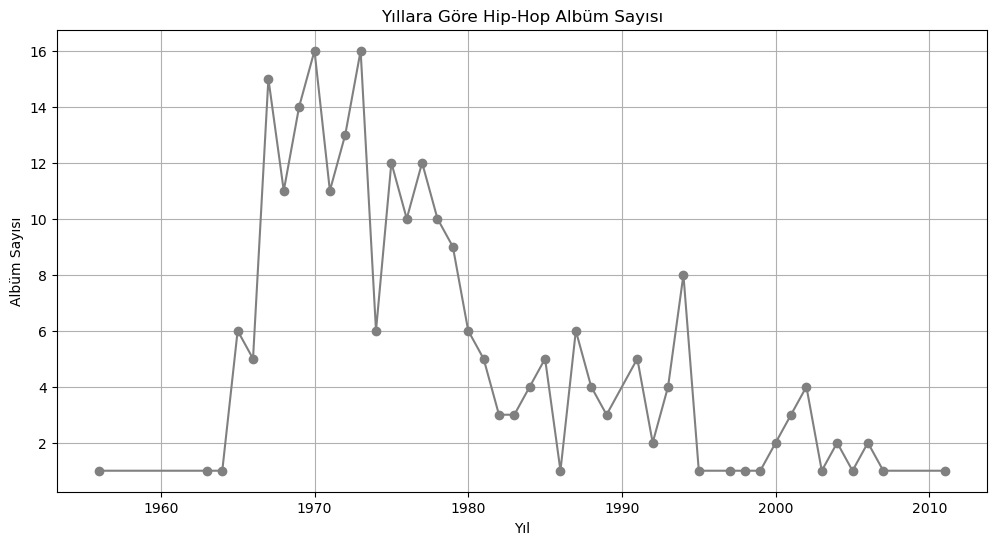

In [66]:
# Hip-hop albümlerini seçme
hiphop_albümleri = veri[veri['Genre'] == 'Rock']

# Yıllara göre hip-hop albüm sayısını hesaplama
hiphop_albüm_sayısı = hiphop_albümleri['Year'].dt.year.value_counts().sort_index()

# Grafiği oluşturma
plt.figure(figsize=(12, 6))
plt.plot(hiphop_albüm_sayısı.index, hiphop_albüm_sayısı.values, marker='o', color='grey')
plt.title("Yıllara Göre Hip-Hop Albüm Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Albüm Sayısı")
plt.grid(True)
plt.show()